In [2]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [3]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.ansatz import RBM
from src.model import Model
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
visible_layer_size = 4
hidden_layer_size = 9
seed = 44  # Seed for random number generator
gradient_steps = 500
walker_steps = 1000
learning_rate = 0.05
termination_condition = 1e-5


In [5]:
np.random.seed(seed)

b = utils.random_complex_array(visible_layer_size)  # Visible layer bias
c = utils.random_complex_array(hidden_layer_size)  # Hidden layer bias
W = utils.random_complex_matrix(visible_layer_size, hidden_layer_size)  # Visible - hidden weights
#H = random_hamiltonian(2**visible_layer_size)  # Hamiltonian
H = np.diag(np.random.randint(-5, 6, 2**visible_layer_size))  # Hamiltonia
#H = np.diag([-2, 0, 2, -7])  # Hamiltonian

In [6]:
walker = mcmc.Walker(steps=walker_steps)
rbm = RBM(visible_bias=b, hidden_bias=c, weights=W)  # Initializing RBM currently with random configuration and parameters
model_1 = Model(rbm, walker, H)  # Initializing model with RBM and Hamiltonian
model_2 = copy.deepcopy(model_1)  # Cloning model to have two copies to train on
model_3 = copy.deepcopy(model_1)
model_4 = copy.deepcopy(model_1)

In [7]:
print(f"RBM GS energy before training: {model_1.exact_energy()}")
print(f"Exact ground state energy (target): {min(np.linalg.eigvalsh(H))}")

RBM GS energy before training: (2.851969944039467-6.919196482528386e-18j)
Exact ground state energy (target): -5.0


In [8]:
# Training models
#fd_plot_exact_list = model_1.gradient_descent(gradient_method='finite_difference', exact_dist=True, n_steps=gradient_steps, learning_rate=learning_rate, termination_condition=termination_condition)
#analytic_plot_est_list = model_2.gradient_descent(gradient_method='analytical', exact_dist=False, n_steps=gradient_steps, learning_rate=learning_rate, termination_condition=termination_condition)
#fd_plot_est_list = model_3.gradient_descent(gradient_method='finite_difference', exact_dist=False, n_steps=gradient_steps, learning_rate=learning_rate, termination_condition=termination_condition)
analytic_plot_exact_list = model_4.gradient_descent(gradient_method='analytical', exact_dist=True, n_steps=gradient_steps, learning_rate=learning_rate, termination_condition=termination_condition)


Gradient descent step 1, energy: (2.851969944039467-6.919196482528386e-18j)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

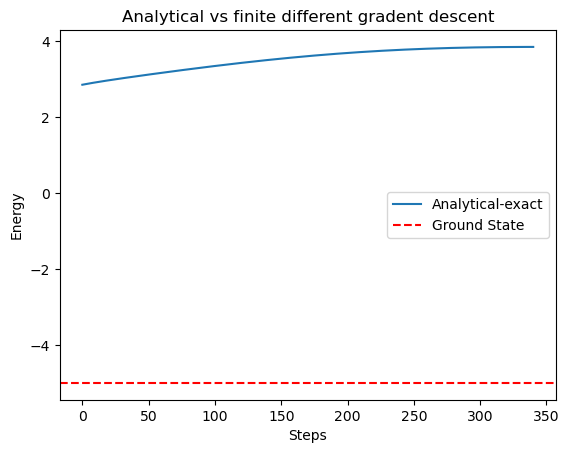

In [8]:
#plt.plot(np.real(fd_plot_exact_list), label='FD-exact')
#plt.plot(np.real(fd_plot_est_list), label='FD-estimated')
plt.plot(np.real(analytic_plot_exact_list), label='Analytical-exact')
#plt.plot(np.real(analytic_plot_est_list), label='Analytical-est')
plt.axhline(y=min(np.linalg.eigvalsh(H)), color='red', linestyle='--', label='Ground State')
plt.title('Analytical vs finite different gradent descent')
plt.xlabel('Steps')
plt.ylabel('Energy')
plt.legend()


In [24]:
print(f"Estimated energy FD-exact: {model_1.estimate_energy()}")
print(f"Estimated energy Analytic-estimated: {model_2.estimate_energy()}")
print(f"Estimated energy FD-estimated: {model_3.estimate_energy()}")
print(f"Estimated energy Analytic-exact: {model_4.estimate_energy()}")

Estimated energy FD-exact: -6.979
Estimated energy Analytic-estimated: -6.986
Estimated energy FD-estimated: -6.183
Estimated energy Analytic-exact: -6.979
